In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report,confusion_matrix

    from IPython.display import Image  
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from sklearn.tree import export_graphviz
    import pydot 
    import time
except Exception as e:
    print("One of the libraries was not installed")
    print(e)
    
%matplotlib inline

In [2]:
import skopt
skopt.__version__

'0.8.1'

In [3]:
import sklearn
sklearn.__version__

'0.23.2'

In [4]:
print(f"Executed at: {time.ctime()}")

Executed at: Tue Sep 29 06:29:44 2020


In [5]:
data = pd.read_csv("../../data/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9348 non-null   object 
 1   isRe           9348 non-null   object 
 2   underscore     9348 non-null   object 
 3   priority       9348 non-null   object 
 4   isInReplyTo    9348 non-null   object 
 5   sortedRec      9348 non-null   object 
 6   subPunc        9348 non-null   object 
 7   multipartText  9348 non-null   object 
 8   hasImages      9348 non-null   object 
 9   isPGPsigned    9348 non-null   object 
 10  subSpamWords   9341 non-null   object 
 11  noHost         9347 non-null   object 
 12  numEnd         9348 non-null   object 
 13  isYelling      9341 non-null   object 
 14  isOrigMsg      9348 non-null   object 
 15  isDear         9348 non-null   object 
 16  isWrote        9348 non-null   object 
 17  numLines       9348 non-null   int64  
 18  bodyChar

### Converting boolean columns to right format

In [6]:
allBoolCols = data.select_dtypes(include='object').columns
allBoolCols

Index(['isSpam', 'isRe', 'underscore', 'priority', 'isInReplyTo', 'sortedRec',
       'subPunc', 'multipartText', 'hasImages', 'isPGPsigned', 'subSpamWords',
       'noHost', 'numEnd', 'isYelling', 'isOrigMsg', 'isDear', 'isWrote'],
      dtype='object')

In [7]:
for boolCol in allBoolCols:
    data = data.replace({boolCol: {'T': True, 'F': False}})
    data[boolCol] = data[boolCol].astype(bool) 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9348 non-null   bool   
 1   isRe           9348 non-null   bool   
 2   underscore     9348 non-null   bool   
 3   priority       9348 non-null   bool   
 4   isInReplyTo    9348 non-null   bool   
 5   sortedRec      9348 non-null   bool   
 6   subPunc        9348 non-null   bool   
 7   multipartText  9348 non-null   bool   
 8   hasImages      9348 non-null   bool   
 9   isPGPsigned    9348 non-null   bool   
 10  subSpamWords   9348 non-null   bool   
 11  noHost         9348 non-null   bool   
 12  numEnd         9348 non-null   bool   
 13  isYelling      9348 non-null   bool   
 14  isOrigMsg      9348 non-null   bool   
 15  isDear         9348 non-null   bool   
 16  isWrote        9348 non-null   bool   
 17  numLines       9348 non-null   int64  
 18  bodyChar

In [9]:
data.head()

isSpam   isRe  underscore  priority  isInReplyTo  sortedRec  subPunc  \
0   False   True       False     False         True       True    False   
1   False  False       False     False        False       True    False   
2   False  False       False     False        False       True    False   
3   False  False       False     False        False       True    False   
4   False   True       False     False        False       True    False   

   multipartText  hasImages  isPGPsigned  ...  subQuesCt  numAtt  numRec  \
0          False      False        False  ...        0.0       0     2.0   
1          False      False        False  ...        0.0       0     1.0   
2          False      False        False  ...        0.0       0     1.0   
3          False      False        False  ...        0.0       0     0.0   
4          False      False        False  ...        0.0       0     1.0   

    perCaps  hour  perHTML  subBlanks  forwards  avgWordLen  numDlr  
0  4.451039    11      0.0  12.500000  0.000000    4.376623       3  
1  7.491289    11      0.0   8.000000  0.000000    4.555556       0  
2  7.436096    12      0.0   8.000000  0.000000    4.817164       0  
3  5.090909    13      0.0  18.918919  3.125000    4.714286       0  
4  6.116643    13      0.0  15.217391  6.451613    4.234940       0  

[5 rows x 30 columns]

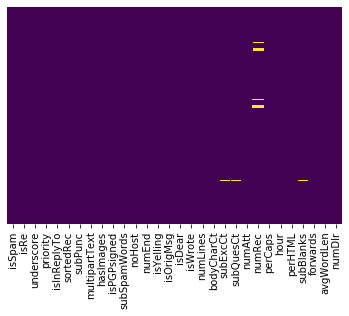

In [10]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
data.isnull().sum()

isSpam             0
isRe               0
underscore         0
priority           0
isInReplyTo        0
sortedRec          0
subPunc            0
multipartText      0
hasImages          0
isPGPsigned        0
subSpamWords       0
noHost             0
numEnd             0
isYelling          0
isOrigMsg          0
isDear             0
isWrote            0
numLines           0
bodyCharCt         0
subExcCt          20
subQuesCt         20
numAtt             0
numRec           282
perCaps            0
hour               0
perHTML            0
subBlanks         20
forwards           0
avgWordLen         0
numDlr             0
dtype: int64

In [12]:
missingCols = data.columns[data.isnull().sum() > 0]
missingCols

Index(['subExcCt', 'subQuesCt', 'numRec', 'subBlanks'], dtype='object')

In [13]:
data[missingCols].dtypes

subExcCt     float64
subQuesCt    float64
numRec       float64
subBlanks    float64
dtype: object

In [14]:
for missingCol in missingCols:
    print(missingCol)
    print(data[missingCol].unique())

subExcCt
[ 0.  1.  3.  2. nan  8.  4.  5. 42.]
subQuesCt
[ 0.  3.  1.  2.  4. nan  8. 12.  5.]
numRec
[  2.   1.   0.   3.   4.   5.   7.   6.  nan  11.  12.   8.  10.   9.
  46.  13.  15.  16.  45.  14.  19.  37.  48.  44.  30.  54.  18.  27.
  24.  47.  21.  68.  74. 311.  42.  43.  32.  34.  29.  25.  35.  23.
  28.  49.  75.  38.  17.  26.  22.  39.  36.  66.]
subBlanks
[12.5         8.         18.91891892 15.2173913  17.0212766   6.25
 11.11111111 10.63829787 14.89361702 15.55555556 17.64705882 12.
 11.86440678 12.12121212 10.         13.51351351 14.70588235 16.21621622
  9.09090909 13.46153846 14.28571429  0.          2.43902439 13.63636364
 15.38461538  5.88235294 17.07317073 13.79310345 19.04761905 17.39130435
 13.33333333  6.89655172 15.625      18.36734694 18.86792453 20.
 16.66666667 11.42857143 10.52631579 15.78947368 13.75       11.53846154
 20.83333333 20.58823529 14.58333333 14.81481481 16.36363636 11.76470588
 13.15789474 17.5        10.34482759 13.7254902  13.1147541  

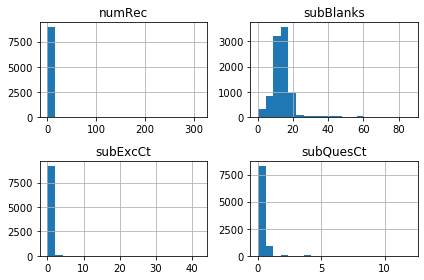

In [15]:
data[missingCols].hist(bins=20)
plt.tight_layout()

In [16]:
data[data.isnull().sum(axis=1).astype(bool)]

isSpam   isRe  underscore  priority  isInReplyTo  sortedRec  subPunc  \
1556   False  False       False     False        False       True    False   
1557   False  False       False     False         True       True    False   
1558   False  False       False     False         True       True    False   
1559   False  False       False     False         True       True    False   
1561   False  False       False     False         True       True    False   
...      ...    ...         ...       ...          ...        ...      ...   
8551    True  False        True     False        False       True    False   
8624    True  False       False     False        False       True    False   
8631    True  False       False     False        False       True    False   
8787    True  False       False     False        False       True    False   
9091    True  False       False     False        False       True    False   

      multipartText  hasImages  isPGPsigned  ...  subQuesCt  numAtt  numRec  \
1556          False      False        False  ...        0.0       0     NaN   
1557          False      False        False  ...        0.0       0     NaN   
1558          False      False        False  ...        0.0       0     NaN   
1559          False      False        False  ...        1.0       0     NaN   
1561          False      False        False  ...        1.0       0     NaN   
...             ...        ...          ...  ...        ...     ...     ...   
8551          False      False        False  ...        0.0       0     NaN   
8624          False      False        False  ...        NaN       0     1.0   
8631          False      False        False  ...        0.0       0     NaN   
8787          False      False        False  ...        NaN       0     1.0   
9091          False      False        False  ...        NaN       0     1.0   

        perCaps  hour   perHTML  subBlanks   forwards  avgWordLen  numDlr  
1556   9.326425    22   0.00000  12.903226   0.000000    4.488372       0  
1557   2.668446    22   0.00000  12.903226  48.888889    4.118132       0  
1558  10.000000    22   0.00000  12.903226  28.571429    4.054054       0  
1559   2.878465     2   0.00000   9.090909   9.090909    3.991489       0  
1561   3.596560     2   0.00000   9.090909   0.000000    4.099359       0  
...         ...   ...       ...        ...        ...         ...     ...  
8551   6.771263    14  33.35946  14.634150   0.000000    3.755039       0  
8624   6.995885    13   0.00000        NaN   0.000000    5.885813       0  
8631   6.265256    18  35.09799  16.666670   0.000000    3.657738       0  
8787  14.901050    22   0.00000        NaN   0.000000    4.585409       2  
9091   4.038174    10  11.05807        NaN   0.000000    4.324256       0  

[302 rows x 30 columns]

In [17]:
# TODO: We can impute the missing values, but we should be careful since some of them have been loaded as float, but should really be int
# For now, I will just remove them

In [18]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9046 non-null   bool   
 1   isRe           9046 non-null   bool   
 2   underscore     9046 non-null   bool   
 3   priority       9046 non-null   bool   
 4   isInReplyTo    9046 non-null   bool   
 5   sortedRec      9046 non-null   bool   
 6   subPunc        9046 non-null   bool   
 7   multipartText  9046 non-null   bool   
 8   hasImages      9046 non-null   bool   
 9   isPGPsigned    9046 non-null   bool   
 10  subSpamWords   9046 non-null   bool   
 11  noHost         9046 non-null   bool   
 12  numEnd         9046 non-null   bool   
 13  isYelling      9046 non-null   bool   
 14  isOrigMsg      9046 non-null   bool   
 15  isDear         9046 non-null   bool   
 16  isWrote        9046 non-null   bool   
 17  numLines       9046 non-null   int64  
 18  bodyChar

In [19]:
# Takes a long time
# sns.pairplot(data, hue='isSpam', palette='Set1')

### EDA

##### Following features show up on the higher end of the feature importance chart

In [20]:
dataEDA = data.copy()
dataEDA['numLines(log)'] = np.log10(dataEDA['numLines'])
dataEDA['bodyCharCt(log)'] = np.log10(dataEDA['bodyCharCt'])
dataEDA['numAtt(log)'] = np.log10(dataEDA['numAtt']+0.001)

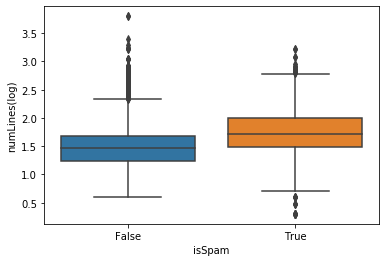

In [21]:
ax = sns.boxplot(x="isSpam", y="numLines(log)", data=dataEDA)

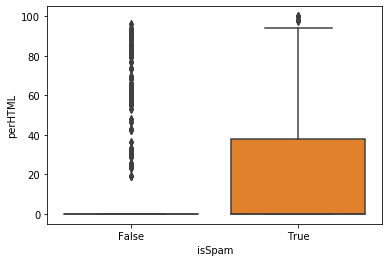

In [22]:
ax = sns.boxplot(x="isSpam", y="perHTML", data=dataEDA)

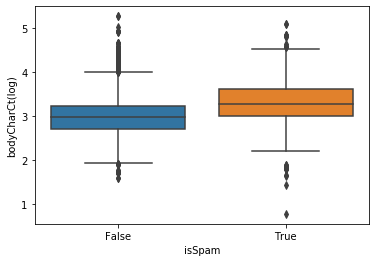

In [23]:
ax = sns.boxplot(x="isSpam", y="bodyCharCt(log)", data=dataEDA)

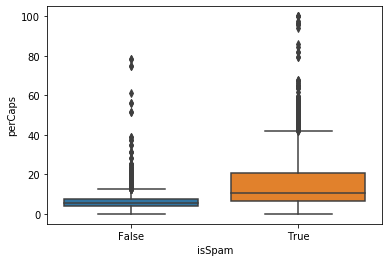

In [24]:
ax = sns.boxplot(x="isSpam", y="perCaps", data=dataEDA)

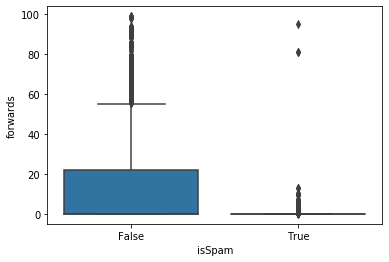

In [25]:
ax = sns.boxplot(x="isSpam", y="forwards", data=dataEDA)

##### The following variable show up lower on the feature importance

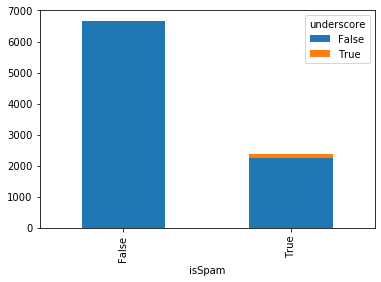

In [26]:
pd.crosstab(dataEDA['isSpam'], dataEDA['underscore']).plot(kind='bar', stacked=True)

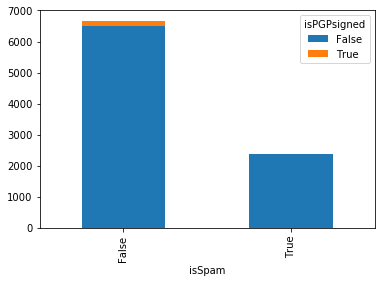

In [27]:
pd.crosstab(dataEDA['isSpam'], dataEDA['isPGPsigned']).plot(kind='bar', stacked=True)

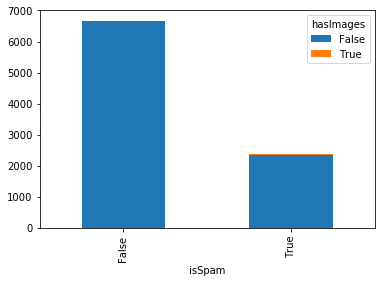

In [28]:
pd.crosstab(dataEDA['isSpam'], dataEDA['hasImages']).plot(kind='bar', stacked=True)

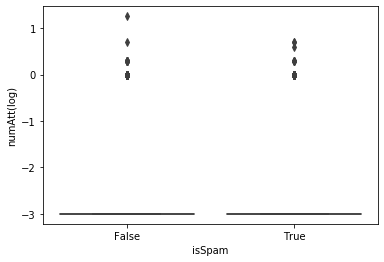

In [29]:
ax = sns.boxplot(x="isSpam", y="numAtt(log)", data=dataEDA)

### Train Test Split

In [30]:
X = data.drop('isSpam',axis=1)
y = data['isSpam']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Decision Trees

In [32]:
# ?DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train, scoring='f1', cv=10)

array([0.93048128, 0.93617021, 0.9375    , 0.91428571, 0.912     ,
       0.91292876, 0.90957447, 0.92225201, 0.93261456, 0.93333333])

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
predictions = clf.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1347
        True       0.94      0.94      0.94       463

    accuracy                           0.97      1810
   macro avg       0.96      0.96      0.96      1810
weighted avg       0.97      0.97      0.97      1810



In [37]:
print(confusion_matrix(y_test,predictions))

[[1320   27]
 [  30  433]]


### Feature Importance (Global)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.decision_path

In [38]:
# Option 1
clf.feature_importances_

array([0.00110839, 0.        , 0.00062261, 0.03790348, 0.00275315,
       0.00195991, 0.01741055, 0.00129685, 0.        , 0.01197327,
       0.00199384, 0.01925102, 0.01280928, 0.0010498 , 0.01931921,
       0.00740536, 0.09632187, 0.11389397, 0.02407679, 0.0006404 ,
       0.00493921, 0.01009969, 0.26575162, 0.01449776, 0.09866091,
       0.0679384 , 0.05574947, 0.04191175, 0.06866142])

In [39]:
# Option 2
from sklearn.inspection import permutation_importance
importances = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)
indices = np.argsort(importances.importances_mean)[::-1]

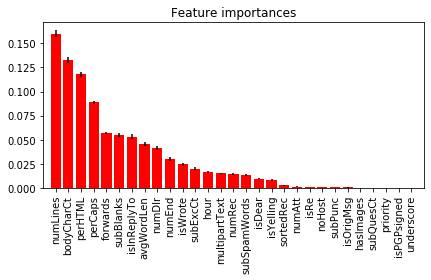

In [40]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(
    range(X_train.shape[1]),
    importances.importances_mean[indices],
    color="r",
    yerr=importances.importances_std[indices],
    align="center"
)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [41]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
# Show a Grid with pairs of important predictors and pairs of not so good predictors

In [44]:
indices

array([16, 17, 24, 22, 26, 25,  3, 27, 28, 11, 15, 18, 23,  6, 21,  9, 14,
       12,  4, 20,  0, 10,  5, 13,  7, 19,  2,  8,  1], dtype=int64)

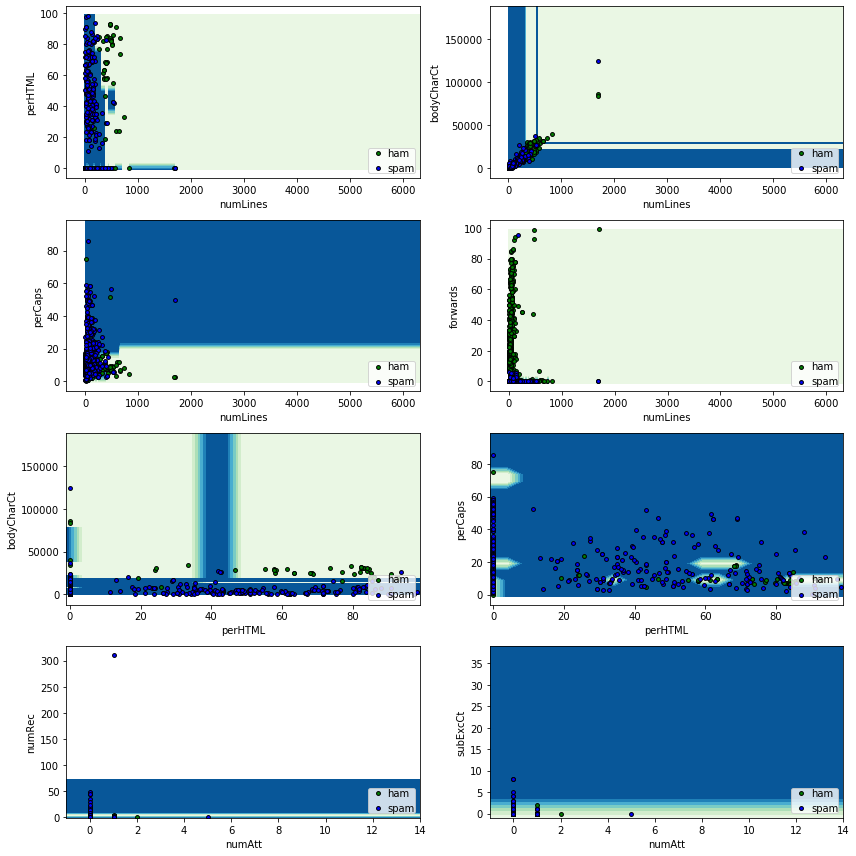

In [138]:
# Parameters
n_classes = 2
plot_colors = "gb"
plot_step = 5

plt.figure(figsize=(12,12))
plt.title("Decision surface of a decision tree using paired features")

for pairidx, pair in enumerate([[16, 24], [16, 17], [16, 22], [16, 26], [24, 17], [24, 22], # Good Features
                                [20, 21], [20, 18]
                               ]): 
    # We only take the two corresponding features
    X = X_train.values[:, pair]
    y = y_train.astype(int).values

    # Train
    clf = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5).fit(X, y)

    # plot_tree(clf, filled=True)
        
    # Plot the decision boundary
    plt.subplot(4, 2, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.GnBu)# 'viridis')#plt.cm.RdYlBu)

    plt.xlabel(X_train.columns[pair[0]])
    plt.ylabel(X_train.columns[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_test.astype(int).values == i)
        plt.scatter(X_test.values[:, pair][idx, 0], X_test.values[:, pair][idx, 1], c=color, label=np.array(['ham', 'spam'][i]),
                    edgecolor='black', s=15)
    
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.tight_layout()

plt.show()


### Feature Importance (Local)

TODO: Try LIME or Shapley

### Tree Visualization

https://mljar.com/blog/visualize-decision-tree/

In [32]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_22 <= 12.52
|   |--- feature_24 <= 3.93
|   |   |--- feature_26 <= 1.59
|   |   |   |--- feature_28 <= 0.50
|   |   |   |   |--- feature_25 <= 24.80
|   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_27 <= 2.77
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_27 >  2.77
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_27 <= 4.97
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_27 >  4.97
|   |   |   |   |   |   |   |   |   |   |   |--- truncated bran

In [33]:
features = list(data.columns[1:])
print(features)

['isRe', 'underscore', 'priority', 'isInReplyTo', 'sortedRec', 'subPunc', 'multipartText', 'hasImages', 'isPGPsigned', 'subSpamWords', 'noHost', 'numEnd', 'isYelling', 'isOrigMsg', 'isDear', 'isWrote', 'numLines', 'bodyCharCt', 'subExcCt', 'subQuesCt', 'numAtt', 'numRec', 'perCaps', 'hour', 'perHTML', 'subBlanks', 'forwards', 'avgWordLen', 'numDlr']


In [34]:
# ?tree.plot_tree

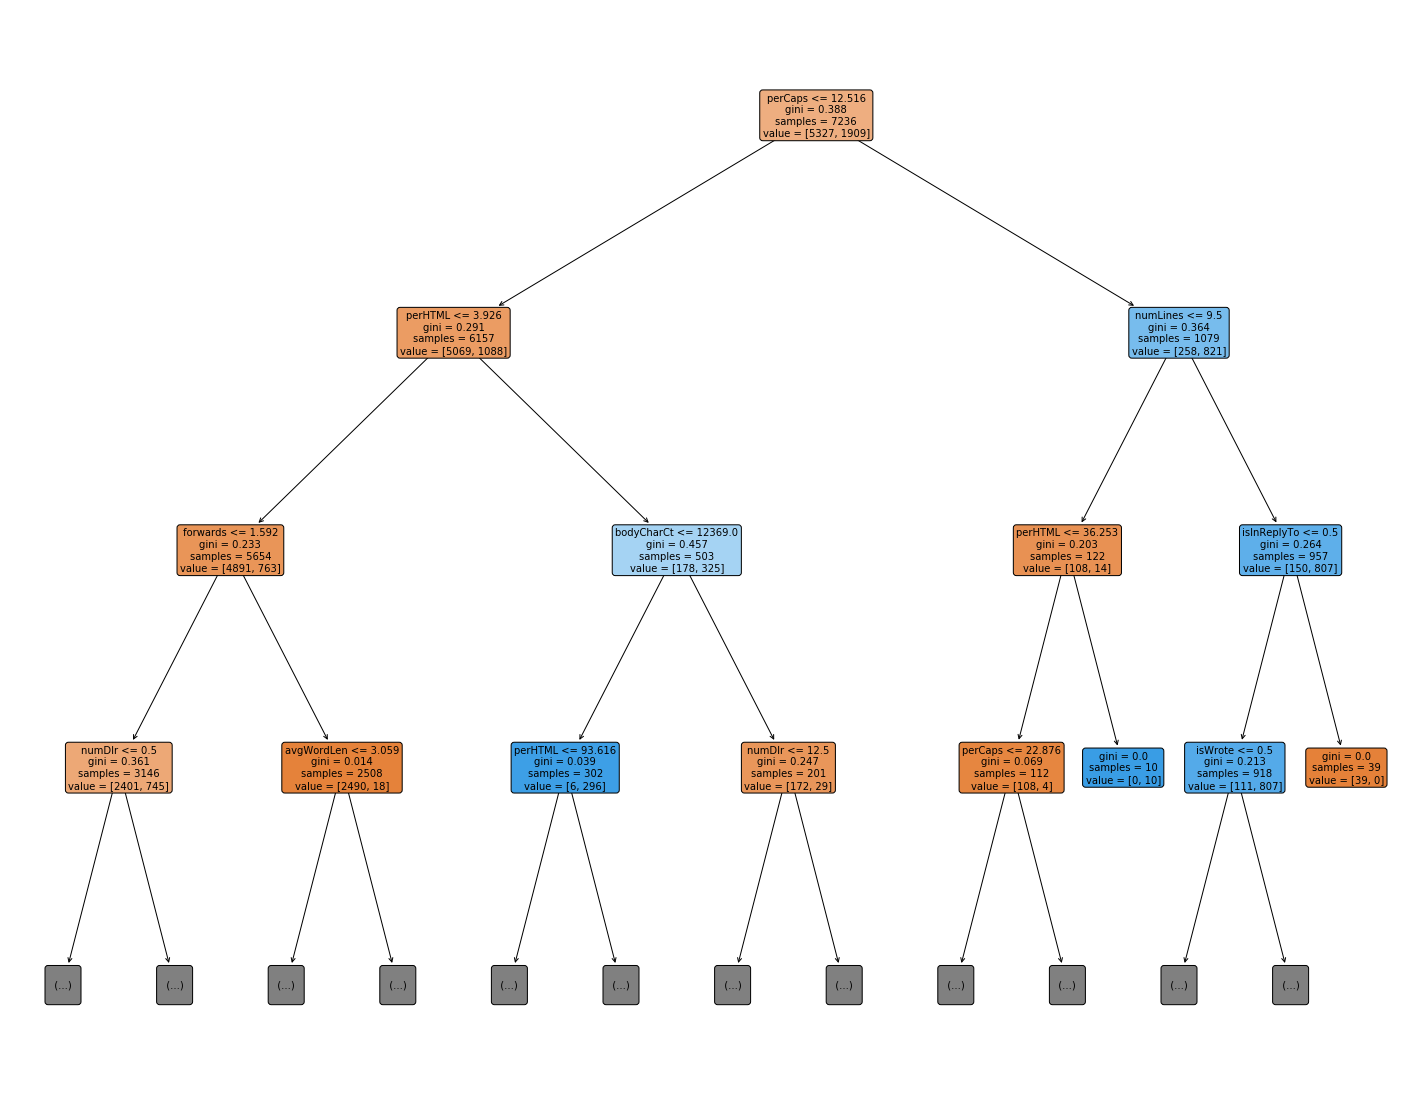

In [42]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    clf, 
    max_depth=3,
    feature_names=features, 
    fontsize=10,
    # class_names=['ham', 'spam'],
    filled=True, rounded=True
)

In [36]:
fig.savefig("decistion_tree.png")

In [37]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
# plt.savefig('output.png', dpi=300)

In [38]:
# dotfile = open("./tree.dot", 'w')
# tree.export_graphviz(dtree, out_file = dotfile, feature_names = features)
# dotfile.close()

### Decision Path

In [39]:
clf.decision_path(X_train.values[0].reshape(1,-1))

<1x581 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [40]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

print(f" n_nodes: {n_nodes}")
print(f" children_left: {children_left}")
print(f" children_right: {children_right}")
print(f" feature: {feature}")
print(f" threshold: {threshold}")

 n_nodes: 581
 children_left: [  1   2   3   4   5   6   7   8   9  10  11  -1  13  14  -1  -1  17  18
  19  20  21  -1  23  24  25  26  27  -1  -1  30  31  32  33  34  -1  -1
  -1  -1  -1  40  41  42  -1  44  -1  46  47  48  -1  50  -1  -1  53  -1
  55  -1  -1  -1  -1  60  61  62  -1  64  -1  -1  -1  68  69  -1  -1  -1
  73  -1  75  76  -1  -1  -1  80  -1  -1  83  84  85  86  -1  -1  89  -1
  -1  -1  93  94  95  96  97  98  -1  -1 101  -1 103 104 105  -1  -1  -1
 109  -1 111 112  -1  -1  -1 116  -1  -1 119  -1 121  -1 123  -1 125  -1
  -1 128 129 130 131 132 133  -1 135  -1  -1  -1 139  -1 141  -1  -1 144
  -1  -1  -1 148  -1  -1  -1  -1 153  -1  -1 156 157 158 159 160  -1  -1
  -1  -1  -1 166 167  -1  -1 170  -1 172 173  -1  -1  -1 177  -1 179 180
 181 182  -1  -1  -1 186  -1 188  -1 190 191  -1  -1  -1  -1 196  -1 198
  -1  -1 201 202 203 204  -1 206 207 208  -1 210 211  -1  -1  -1 215 216
  -1  -1  -1  -1  -1 222 223 224  -1 226  -1  -1 229 230  -1  -1  -1 234
  -1  -1  -1  -1 239 

In [43]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print(f"The binary tree structure has {n_nodes} nodes and has the following tree structure:")
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * " ", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * " ",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 581 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 22] <= 12.515615940093994 else to node 474.
 node=1 test node: go to node 2 if X[:, 24] <= 3.9264414310455322 else to node 443.
  node=2 test node: go to node 3 if X[:, 26] <= 1.592085599899292 else to node 418.
   node=3 test node: go to node 4 if X[:, 28] <= 0.5 else to node 301.
    node=4 test node: go to node 5 if X[:, 25] <= 24.79624080657959 else to node 300.
     node=5 test node: go to node 6 if X[:, 18] <= 0.5 else to node 265.
      node=6 test node: go to node 7 if X[:, 6] <= 0.5 else to node 238.
       node=7 test node: go to node 8 if X[:, 14] <= 0.5 else to node 237.
        node=8 test node: go to node 9 if X[:, 11] <= 0.5 else to node 200.
         node=9 test node: go to node 10 if X[:, 12] <= 0.5 else to node 195.
          node=10 test node: go to node 11 if X[:, 27] <= 2.7698200941085815 else to node 12.
           node=11 leaf node.
           node

In [39]:
def plot_path(sample_id, clf, X):
    if isinstance(X, pd.DataFrame):
        X_values = X.values
        
    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.
    node_indicator = clf.decision_path(X_values)

    # Similarly, we can also have the leaves ids reached by each sample.
    leave_id = clf.apply(X_values)

    node_index = node_indicator.indices[
        node_indicator.indptr[sample_id]:
        node_indicator.indptr[sample_id + 1]
    ]

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_values[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X[%s, %s (%s)] (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 X.columns[feature[node_id]],
                 X_values[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))

In [40]:
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.
sample_id = 0
plot_path(0, clf, X_test)

Rules used to predict sample 0: 
decision id node 0 : (X[0, 22 (perCaps)] (= 6.34005763688761) <= 12.515615940093994)
decision id node 1 : (X[0, 24 (perHTML)] (= 0.0) <= 3.9264414310455322)
decision id node 2 : (X[0, 26 (forwards)] (= 53.84615384615379) > 1.592085599899292)
decision id node 416 : (X[0, 27 (avgWordLen)] (= 3.98850574712644) > 3.0593059062957764)
decision id node 418 : (X[0, 25 (subBlanks)] (= 14.8148148148148) <= 30.871212005615234)
decision id node 419 : (X[0, 14 (isDear)] (= False) <= 0.5)
decision id node 420 : (X[0, 26 (forwards)] (= 53.84615384615379) > 5.814739465713501)
decision id node 434 : (X[0, 6 (multipartText)] (= False) <= 0.5)


In [41]:
plot_path(1, clf, X_test)

Rules used to predict sample 1: 
decision id node 0 : (X[1, 22 (perCaps)] (= 8.962264150943401) <= 12.515615940093994)
decision id node 1 : (X[1, 24 (perHTML)] (= 0.0) <= 3.9264414310455322)
decision id node 2 : (X[1, 26 (forwards)] (= 0.0) <= 1.592085599899292)
decision id node 3 : (X[1, 28 (numDlr)] (= 0) <= 0.5)
decision id node 4 : (X[1, 25 (subBlanks)] (= 16.363636363636402) <= 24.79624080657959)
decision id node 5 : (X[1, 18 (subExcCt)] (= 0.0) <= 0.5)
decision id node 6 : (X[1, 6 (multipartText)] (= False) <= 0.5)
decision id node 7 : (X[1, 14 (isDear)] (= False) <= 0.5)
decision id node 8 : (X[1, 11 (numEnd)] (= False) <= 0.5)
decision id node 9 : (X[1, 12 (isYelling)] (= False) <= 0.5)
decision id node 10 : (X[1, 27 (avgWordLen)] (= 5.72972972972973) > 2.7698200941085815)
decision id node 12 : (X[1, 21 (numRec)] (= 1.0) > 0.5)
decision id node 16 : (X[1, 9 (subSpamWords)] (= False) <= 0.5)
decision id node 17 : (X[1, 27 (avgWordLen)] (= 5.72972972972973) > 5.265121936798096)
d

In [42]:
plot_path(2, clf, X_test)

Rules used to predict sample 2: 
decision id node 0 : (X[2, 22 (perCaps)] (= 6.92717584369449) <= 12.515615940093994)
decision id node 1 : (X[2, 24 (perHTML)] (= 0.0) <= 3.9264414310455322)
decision id node 2 : (X[2, 26 (forwards)] (= 0.0) <= 1.592085599899292)
decision id node 3 : (X[2, 28 (numDlr)] (= 0) <= 0.5)
decision id node 4 : (X[2, 25 (subBlanks)] (= 18.181818181818198) <= 24.79624080657959)
decision id node 5 : (X[2, 18 (subExcCt)] (= 0.0) <= 0.5)
decision id node 6 : (X[2, 6 (multipartText)] (= False) <= 0.5)
decision id node 7 : (X[2, 14 (isDear)] (= False) <= 0.5)
decision id node 8 : (X[2, 11 (numEnd)] (= False) <= 0.5)
decision id node 9 : (X[2, 12 (isYelling)] (= False) <= 0.5)
decision id node 10 : (X[2, 27 (avgWordLen)] (= 4.468253968253969) > 2.7698200941085815)
decision id node 12 : (X[2, 21 (numRec)] (= 2.0) > 0.5)
decision id node 16 : (X[2, 9 (subSpamWords)] (= False) <= 0.5)
decision id node 17 : (X[2, 27 (avgWordLen)] (= 4.468253968253969) <= 5.265121936798096)

In [43]:
def find_common_nodes(sample_ids, clf, X, verbose=0):
    # For a group of samples, we have the following common node.
    
    if isinstance(X, pd.DataFrame):
        X_values = X.values
        
    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.
    node_indicator = clf.decision_path(X_values)
    
    n_nodes = clf.tree_.node_count

    common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)) # Common
    common_node_id = np.arange(n_nodes)[common_nodes]

    any_nodes    = (node_indicator.toarray()[sample_ids].sum(axis=0) >= 1)  # Present in at least 1 path

    percent_any_path_nodes   = 100 * len(common_node_id) / sum(any_nodes)
    percent_total_nodes = 100 * len(common_node_id) / n_nodes

    if verbose:
        print("\nThe following samples %s share the node %s in the tree" % (sample_ids, common_node_id))
        print(f"It is {percent_any_path_nodes} % of nodes in any of these sample paths.")
        print(f"It is {percent_total_nodes} % of all nodes.")
    return (percent_any_path_nodes, percent_total_nodes)

In [44]:
y_test.head()

1263    False
93      False
3452    False
6292    False
8102     True
Name: isSpam, dtype: bool

In [45]:
sample_ids = [0, 0]
_ = find_common_nodes(sample_ids, clf, X_test, verbose=1)

sample_ids = [0, 1]
_ = find_common_nodes(sample_ids, clf, X_test, verbose=1)

sample_ids = [0, 2]
_ = find_common_nodes(sample_ids, clf, X_test, verbose=1)

sample_ids = [2, 3]
_ = find_common_nodes(sample_ids, clf, X_test, verbose=1)

sample_ids = [1, 5]
_ = find_common_nodes(sample_ids, clf, X_test, verbose=1)


The following samples [0, 0] share the node [  0   1   2 416 418 419 420 434 435] in the tree
It is 100.0 % of nodes in any of these sample paths.
It is 1.5544041450777202 % of all nodes.

The following samples [0, 1] share the node [0 1 2] in the tree
It is 11.538461538461538 % of nodes in any of these sample paths.
It is 0.5181347150259067 % of all nodes.

The following samples [0, 2] share the node [0 1 2] in the tree
It is 11.11111111111111 % of nodes in any of these sample paths.
It is 0.5181347150259067 % of all nodes.

The following samples [2, 3] share the node [0 1 2] in the tree
It is 11.11111111111111 % of nodes in any of these sample paths.
It is 0.5181347150259067 % of all nodes.

The following samples [1, 5] share the node [ 0  1  2  3  4  5  6  7  8  9 10 12 16 17] in the tree
It is 43.75 % of nodes in any of these sample paths.
It is 2.4179620034542313 % of all nodes.


In [46]:
class_vals = y_train.unique()
class_vals

array([ True, False])

In [47]:
size = int(len(X_test)/20)
common_array = np.zeros((size, size))
both_true_array = np.zeros((size, size))
both_false_array = np.zeros((size, size))
one_true_one_false = np.zeros((size, size))
print(common_array.shape)
for i in np.arange(0, size):
    for j in np.arange(0, size):
        common_array[i, j], _ = find_common_nodes([i, j], clf, X_test, verbose=0)
        if y_test.values[i] == y_test.values[j]:
            if y_test.values[i]:
                both_true_array[i, j] = 1
            else:
                both_false_array[i, j] = 1
        else:
            one_true_one_false[i, j] = 1        

(90, 90)


In [48]:
common_array

array([[100.        ,  11.53846154,  11.11111111, ...,  25.        ,
         14.28571429,  14.28571429],
       [ 11.53846154, 100.        ,  51.85185185, ...,  18.18181818,
         12.90322581,   8.        ],
       [ 11.11111111,  51.85185185, 100.        , ...,  17.39130435,
         12.5       ,   7.69230769],
       ...,
       [ 25.        ,  18.18181818,  17.39130435, ..., 100.        ,
         31.25      ,  18.18181818],
       [ 14.28571429,  12.90322581,  12.5       , ...,  31.25      ,
        100.        ,  10.        ],
       [ 14.28571429,   8.        ,   7.69230769, ...,  18.18181818,
         10.        , 100.        ]])

In [49]:
print(both_true_array.sum())
both_true_array

729.0


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [50]:
print(both_false_array.sum())
both_false_array

3969.0


array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
print(one_true_one_false.sum())
one_true_one_false

3402.0


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [52]:
common_true = (common_array * both_true_array).reshape(-1)
common_true = common_true[(common_true != 0) & (common_true != 100)]
common_false = (common_array * both_false_array).reshape(-1)
common_false = common_false[(common_false != 0) & (common_false != 100)]
common_both = (common_array * one_true_one_false).reshape(-1)
common_both = common_both[(common_both != 0) & (common_both != 100)]

In [53]:
print(np.sum(common_true != 0))
print(np.sum(common_false != 0))
print(np.sum(common_both != 0))

640
3088
3402


In [54]:
common_true = pd.DataFrame({'type': 'BothTrue', 'PercentCommon':common_true})
common_false = pd.DataFrame({'type': 'BothFalse', 'PercentCommon':common_false})
common_both = pd.DataFrame({'type': 'OneTrueOneFalse', 'PercentCommon':common_both})

In [55]:
frames = [common_true, common_false, common_both]
all_common = pd.concat(frames)

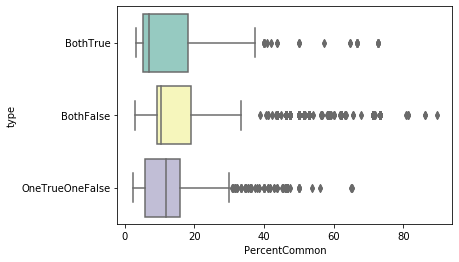

In [56]:
ax = sns.boxplot(y="type", x="PercentCommon",
                 data=all_common, palette="Set3")

### Hyperparameter Optimization

#### First Method

In [57]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [58]:
# ?DecisionTreeClassifier

# criterion='gini',
# splitter='best',
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.0,
# max_features=None,
# random_state=None,
# max_leaf_nodes=None,
# min_impurity_decrease=0.0,
# min_impurity_split=None,
# class_weight=None,
# presort='deprecated',
# ccp_alpha=0.0,

In [59]:
n_features = X_train.shape[1]

space  = [
    Integer(1, 100, name='max_depth'),
    Integer(1, n_features, name='max_features'),
    Real(0, 1, name='ccp_alpha'),
    Integer(2, 100, name='min_samples_split'),
    Integer(1, 100, name='min_samples_leaf')
]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    dtree = DecisionTreeClassifier()
    dtree.set_params(**params)
    return -np.mean(cross_val_score(dtree, X_train, y_train, cv=3, n_jobs=-1, scoring="f1"))

In [60]:
# ?gp_minimize

In [61]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=42)

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point befor

In [62]:
# Best Parameters
print(f"Best Score (f1): {round(-res_gp.fun,2)}")
print("Best Parameters:")
for i in np.arange(0,len(space)):
    print(f"\t{space[i].name}: {res_gp.x[i]}")

Best Score (f1): 0.91
Best Parameters:
	max_depth: 29
	max_features: 17
	ccp_alpha: 0.0
	min_samples_split: 2
	min_samples_leaf: 1


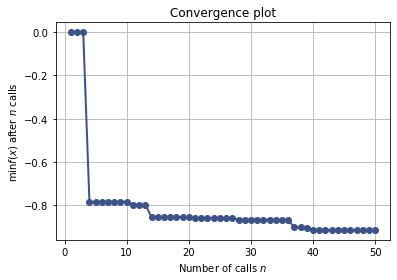

In [63]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)

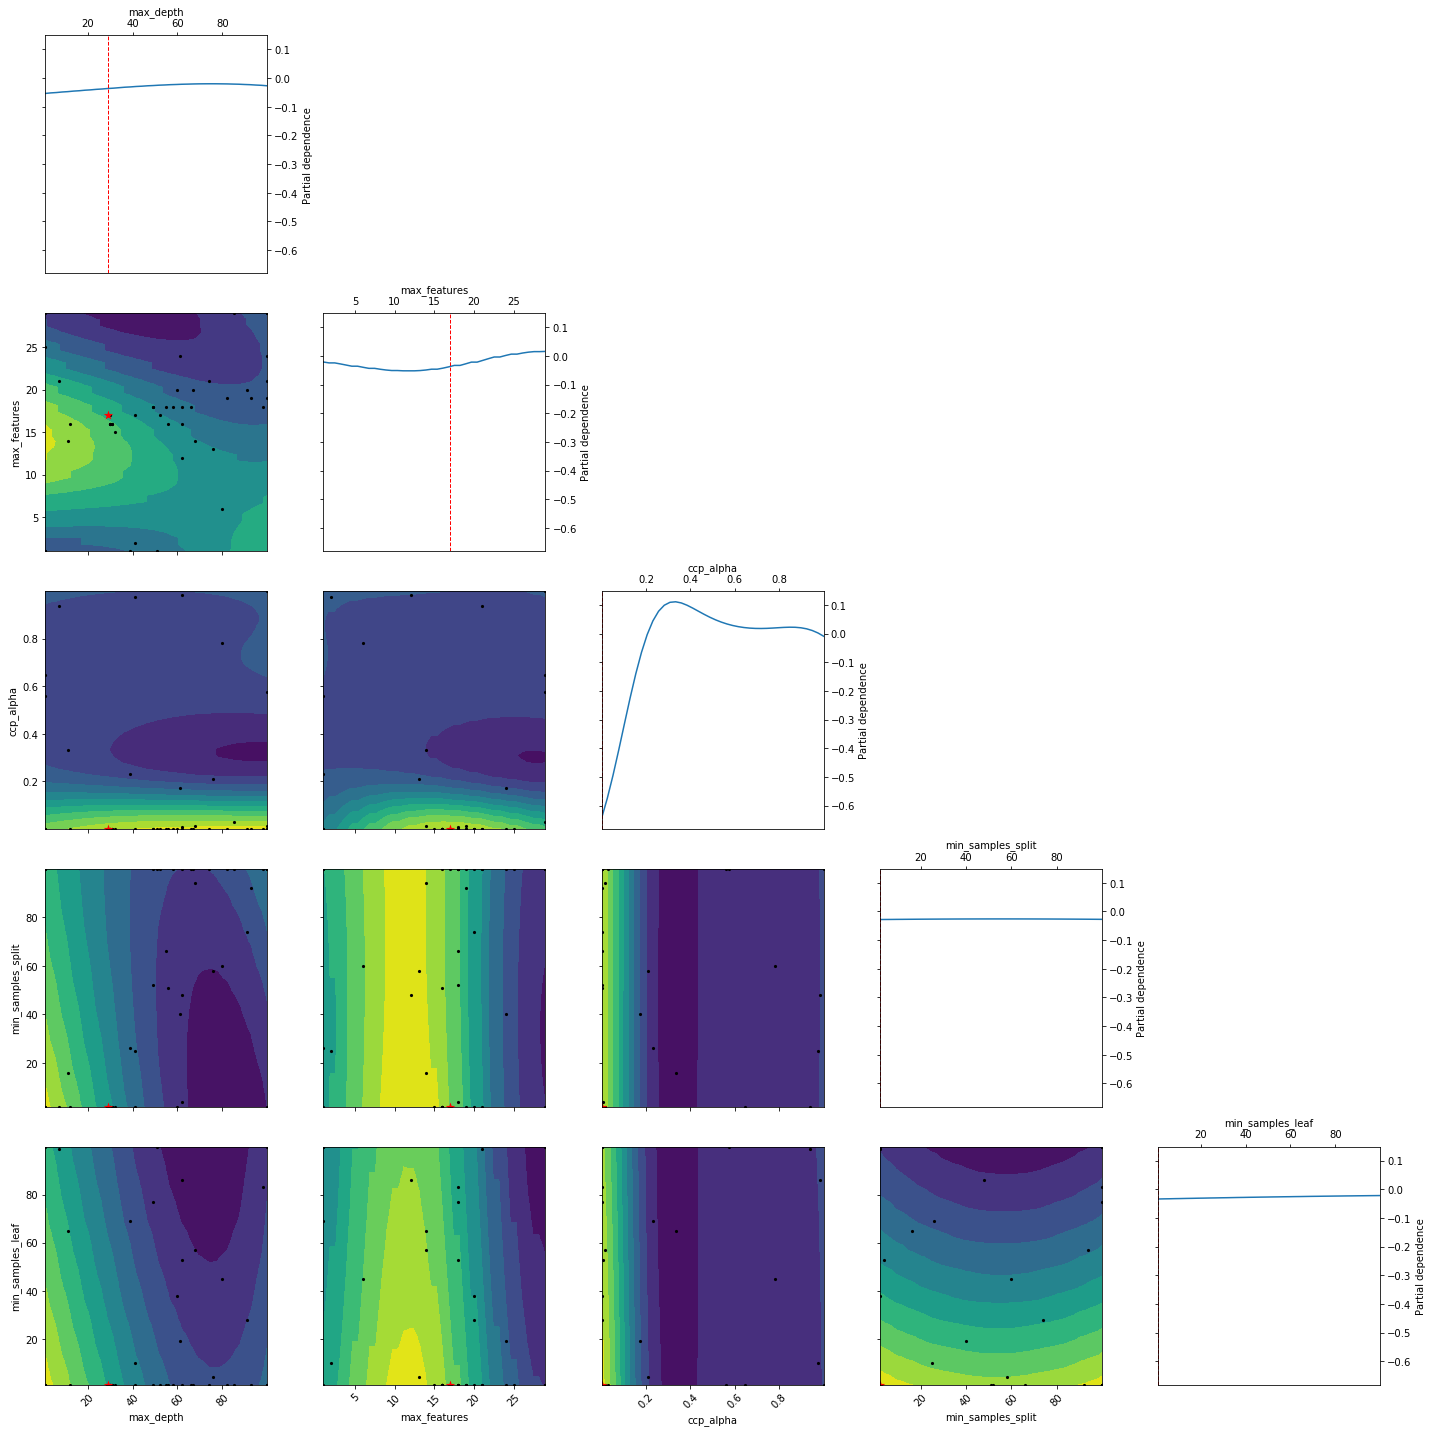

In [101]:
from skopt.plots import plot_objective
plot_objective(res_gp, size=4)
plt.tight_layout()

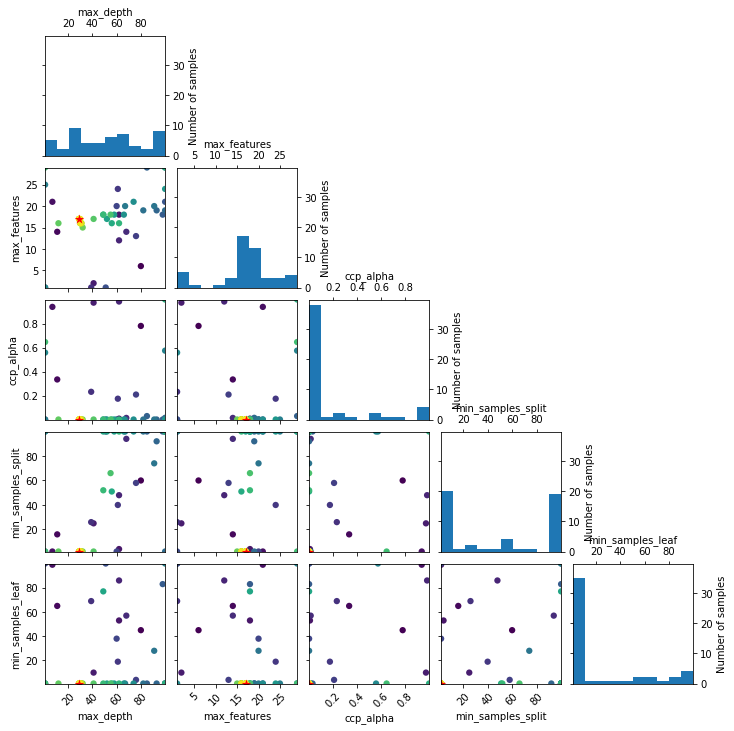

In [65]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(res_gp, bins=10)

In [66]:
# Best Parameters
print(f"Best Score (f1): {round(-res_gp.fun,2)}")
print("Best Parameters:")
for i in np.arange(0,len(space)):
    print(f"\t{space[i].name}: {res_gp.x[i]}")

Best Score (f1): 0.91
Best Parameters:
	max_depth: 29
	max_features: 17
	ccp_alpha: 0.0
	min_samples_split: 2
	min_samples_leaf: 1


In [67]:
clf = DecisionTreeClassifier()
print(clf)
kw_param = {}
for i in np.arange(0,len(space)):
    kw_param[space[i].name] = res_gp.x[i]
clf.set_params(**kw_param)
print(clf)

DecisionTreeClassifier()
DecisionTreeClassifier(max_depth=29, max_features=17)


In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=29, max_features=17)

In [69]:
predictions = clf.predict(X_test)

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1347
        True       0.94      0.94      0.94       463

    accuracy                           0.97      1810
   macro avg       0.96      0.96      0.96      1810
weighted avg       0.97      0.97      0.97      1810



In [71]:
print(confusion_matrix(y_test,predictions))

[[1318   29]
 [  30  433]]


#### Alternate Method

In [72]:
reformatted_space = {param.name: param for param in space}
reformatted_space    

{'max_depth': Integer(low=1, high=100, prior='uniform', transform='identity'),
 'max_features': Integer(low=1, high=29, prior='uniform', transform='identity'),
 'ccp_alpha': Real(low=0, high=1, prior='uniform', transform='identity'),
 'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='identity'),
 'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='identity')}

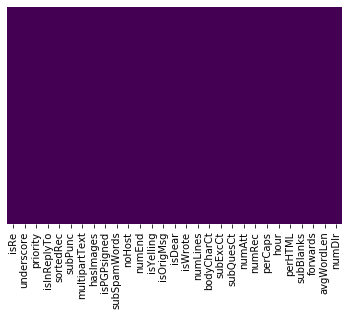

In [84]:
sns.heatmap(pd.DataFrame(X_train.isnull()), yticklabels=False, cbar=False, cmap='viridis')

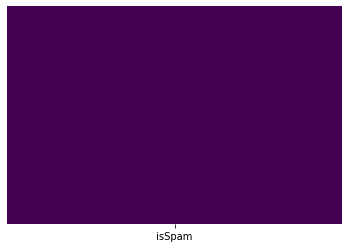

In [85]:
sns.heatmap(pd.DataFrame(y_train.isnull()), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
print(X_train.shape)
print(y_train.shape)

(7236, 29)
(7236,)


In [139]:
from skopt import BayesSearchCV
opt = BayesSearchCV(
    estimator=DecisionTreeClassifier(),
    search_spaces=reformatted_space,
    scoring='f1',
    n_iter=50,
    n_points=15,
    cv=3,
    n_jobs=-1,
    verbose=0,
    random_state=42
)
opt.fit(X_train, y_train)

NameError: name 'reformatted_space' is not defined

In [ ]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

In [ ]:
opt.best_params_

In [ ]:
clf = opt.best_estimator_
clf

In [ ]:
# Plotting not working with 0.7.4
# https://scikit-optimize.github.io/0.8/auto_examples/sklearn-gridsearchcv-replacement.html
opt.optimizer_results_[0]